In [5]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import datetime
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
import matplotlib.pyplot as plt 

In [6]:
data = pd.read_csv("./Dataset/data.csv")
data = data.head(66000)

#### Convering timestamp to datetime

In [7]:
teste = data.copy()
teste["timestamp"] = teste["timestamp"] / 1000
teste["timestamp"] = teste['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
teste.reset_index(drop=True, inplace=True)

#### Normalising data

In [8]:
scaler_price = MinMaxScaler(feature_range=(0,1))
scaler_volume= MinMaxScaler(feature_range=(0,1))
scaler_trades = MinMaxScaler(feature_range=(0,1))

price_scaled = np.array(teste["price"]).copy()
volume_scaled = np.array(teste["volume"]).copy()
trades_scaled = np.array(teste["trades"]).copy()


teste['price'] = scaler_price.fit_transform(price_scaled.reshape(-1,1)).flatten()
teste['volume'] = scaler_volume.fit_transform(volume_scaled.reshape(-1,1)).flatten()
teste['trades'] = scaler_trades.fit_transform(trades_scaled.reshape(-1,1)).flatten()

#### Getting columns to prophet pattern


In [9]:
teste = teste.rename(columns={'timestamp': 'ds', 'price': 'y'})
teste

loki,doki = train_test_split(teste, test_size=0.2, shuffle=False)

09:55:44 - cmdstanpy - INFO - Chain [1] start processing
09:56:23 - cmdstanpy - INFO - Chain [1] done processing


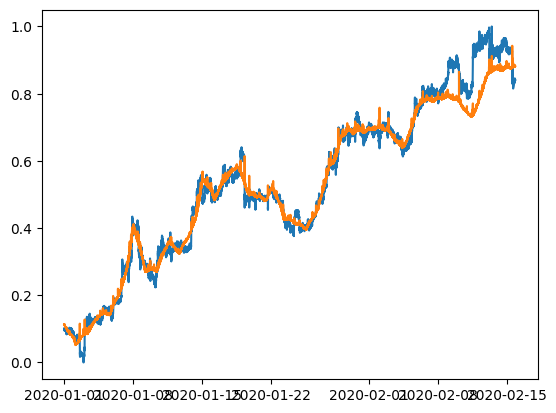

In [11]:
#m = Prophet()
m = Prophet(changepoint_prior_scale=1)
m.add_regressor('volume')
m.add_regressor('trades')
m.fit(loki)
future = m.make_future_dataframe(periods=len(doki), freq="min")

future['volume'] = teste['volume']
future['trades'] = teste['trades']

forecast = m.predict(future)
forecast = forecast[['ds','yhat']]

plt.plot(teste['ds'], teste['y'], label='Real')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')


In [ ]:
print(f"MSE: {mean_squared_error(teste['y'], forecast['yhat'])} \n RMSE: {root_mean_squared_error(teste['y'], forecast['yhat'])} \n R2: {r2_score(teste['y'], forecast['yhat'])}")

MSE: 0.0018501947483129256 
 RMSE: 0.04301389017878906 
 R2: 0.9694105774040503
